In [1]:
from torch import nn
from tqdm import *

class DRNN(nn.Module):
    def __init__(self, input_size, output_size, hidden_size, num_layers):
        super(DRNN, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        # 这里把tanh换成了relu解决梯度爆炸
        self.rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first=True, nonlinearity='relu')
        # batch_first 为 True时output的tensor形状为 (batch, seq, feature)，否则为 (seq, batch, feature)
        self.linear = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
        # 初始化隐藏状态和细胞状态
        state = torch.zeros(self.num_layers, x.size(0), self.hidden_size)
        # 计算输出和最终隐藏状态
        output, _ = self.rnn(x, state)
        output = self.linear(output)
        return output

# 网络结构
model = DRNN(16, 16, 64, 2)
for name, parameters in model.named_parameters():
    print(name, ':', parameters.size())

rnn.weight_ih_l0 : torch.Size([64, 16])
rnn.weight_hh_l0 : torch.Size([64, 64])
rnn.bias_ih_l0 : torch.Size([64])
rnn.bias_hh_l0 : torch.Size([64])
rnn.weight_ih_l1 : torch.Size([64, 64])
rnn.weight_hh_l1 : torch.Size([64, 64])
rnn.bias_ih_l1 : torch.Size([64])
rnn.bias_hh_l1 : torch.Size([64])
linear.weight : torch.Size([16, 64])
linear.bias : torch.Size([16])


In [2]:
class BRNN(nn.Module):
    def __init__(self, input_size, output_size, hidden_size, num_layers):
        super(BRNN, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first=True, bidirectional=True)  # bidirectional为True表示双向
        self.linear = nn.Linear(hidden_size * 2, output_size)  # 双向网络，隐藏状态是hidden_size的两倍
    
    def forward(self, x):
        # 初始化隐藏状态
        state = torch.zeros(self.num_layers * 2, x.size(0), self.hidden_size)  # 需要双向的隐藏状态
        output, _ = self.rnn(x, state)
        output = self.linear(output)
        return output

# 网络结构
model = BRNN(16, 16, 64, 2)
for name, parameters in model.named_parameters():
    print(name, ':', parameters.size())

rnn.weight_ih_l0 : torch.Size([64, 16])
rnn.weight_hh_l0 : torch.Size([64, 64])
rnn.bias_ih_l0 : torch.Size([64])
rnn.bias_hh_l0 : torch.Size([64])
rnn.weight_ih_l0_reverse : torch.Size([64, 16])
rnn.weight_hh_l0_reverse : torch.Size([64, 64])
rnn.bias_ih_l0_reverse : torch.Size([64])
rnn.bias_hh_l0_reverse : torch.Size([64])
rnn.weight_ih_l1 : torch.Size([64, 128])
rnn.weight_hh_l1 : torch.Size([64, 64])
rnn.bias_ih_l1 : torch.Size([64])
rnn.bias_hh_l1 : torch.Size([64])
rnn.weight_ih_l1_reverse : torch.Size([64, 128])
rnn.weight_hh_l1_reverse : torch.Size([64, 64])
rnn.bias_ih_l1_reverse : torch.Size([64])
rnn.bias_hh_l1_reverse : torch.Size([64])
linear.weight : torch.Size([16, 128])
linear.bias : torch.Size([16])


In [3]:
class LSTM(nn.Module):
    def __init__(self, input_size, output_size, hidden_size, num_layers):
        super(LSTM, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)  # LSTM
        self.linear = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
        output, _ = self.lstm(x)
        output = self.linear(output)
        return output

# Network structure
model = LSTM(16, 16, 64, 2)
for name, parameters in model.named_parameters():
    print(name, ':', parameters.size())

lstm.weight_ih_l0 : torch.Size([256, 16])
lstm.weight_hh_l0 : torch.Size([256, 64])
lstm.bias_ih_l0 : torch.Size([256])
lstm.bias_hh_l0 : torch.Size([256])
lstm.weight_ih_l1 : torch.Size([256, 64])
lstm.weight_hh_l1 : torch.Size([256, 64])
lstm.bias_ih_l1 : torch.Size([256])
lstm.bias_hh_l1 : torch.Size([256])
linear.weight : torch.Size([16, 64])
linear.bias : torch.Size([16])


In [4]:
class GRU(nn.Module):
    def __init__(self, input_size, output_size, hidden_size, num_layers):
        super(GRU, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.gru = nn.GRU(input_size, hidden_size, num_layers, batch_first=True)  # GRU
        self.linear = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
        output, _ = self.gru(x)
        output = self.linear(output)
        return output

# Network structure
model = GRU(16, 16, 64, 2)
for name, parameters in model.named_parameters():
    print(name, ':', parameters.size())

gru.weight_ih_l0 : torch.Size([192, 16])
gru.weight_hh_l0 : torch.Size([192, 64])
gru.bias_ih_l0 : torch.Size([192])
gru.bias_hh_l0 : torch.Size([192])
gru.weight_ih_l1 : torch.Size([192, 64])
gru.weight_hh_l1 : torch.Size([192, 64])
gru.bias_ih_l1 : torch.Size([192])
gru.bias_hh_l1 : torch.Size([192])
linear.weight : torch.Size([16, 64])
linear.bias : torch.Size([16])


In [5]:
import pandas_datareader as pdr
dji = pdr.DataReader("^DJI", "stooq")
dji

,Open,High,Low,Close,Volume
Date,,,,,
2024-07-25,39828.63,40438.82,39817.50,39935.07,355148964.0
2024-07-24,40210.63,40258.44,39807.45,39853.87,373377803.0
2024-07-23,40443.73,40527.89,40319.70,40358.09,266176561.0
2024-07-22,40414.49,40472.53,40222.77,40415.44,345101378.0
2024-07-19,40592.35,40626.16,40203.27,40287.53,393903303.0
...,...,...,...,...,...
2019-08-02,26528.66,26570.02,26249.22,26485.01,327541678.0
2019-08-01,26879.86,27175.59,26548.71,26583.42,386261964.0
2019-07-31,27244.67,27281.65,26719.60,26864.27,385238760.0


In [13]:
import torch
from torch.utils.data import DataLoader, TensorDataset

num = len(dji)  # 总数据量
x = torch.tensor(dji['Close'].to_list())  # 股价列表
x = (x - torch.mean(x)) / torch.std(x)


seq_len = 16  # 预测序列长度
batch_size = 16  # 设置批大小

X_feature = torch.zeros((num - seq_len, seq_len))  # 构建特征矩阵，num-seq_len行，seq_len列
Y_label = torch.zeros((num - seq_len, seq_len))  # 构建标签矩阵，形状同特征矩阵
for i in range(seq_len):
    X_feature[:, i] = x[i: num - seq_len + i]  # 为特征矩阵赋值
    Y_label[:, i] = x[i+1: num - seq_len + i + 1]  # 为标签矩阵赋值

train_loader = DataLoader(TensorDataset(
    X_feature[:num-seq_len].unsqueeze(2), Y_label[:num-seq_len]),
    batch_size=batch_size, shuffle=True)  # 构建数据加载器

In [20]:
input_size = 1
output_size = 1
num_hiddens = 64
n_layers = 2
lr = 0.01

In [21]:
model = DRNN(input_size, output_size, num_hiddens, n_layers)
criterion = nn.MSELoss(reduction='none')
trainer = torch.optim.Adam(model.parameters(), lr)

In [22]:
torch.cuda.set_device(1) 

  1%|█                                                                                                               | 1/100 [00:00<01:15,  1.30it/s]

Epoch 0: Validation loss = 0.0116


 11%|████████████▏                                                                                                  | 11/100 [00:07<00:59,  1.50it/s]

Epoch 10: Validation loss = 0.0084


 21%|███████████████████████▎                                                                                       | 21/100 [00:13<00:47,  1.65it/s]

Epoch 20: Validation loss = 0.0083


 31%|██████████████████████████████████▍                                                                            | 31/100 [00:19<00:41,  1.68it/s]

Epoch 30: Validation loss = 0.0072


 41%|█████████████████████████████████████████████▌                                                                 | 41/100 [00:25<00:36,  1.60it/s]

Epoch 40: Validation loss = 0.0062


 51%|████████████████████████████████████████████████████████▌                                                      | 51/100 [00:32<00:31,  1.57it/s]

Epoch 50: Validation loss = 0.0091


 61%|███████████████████████████████████████████████████████████████████▋                                           | 61/100 [00:38<00:25,  1.52it/s]

Epoch 60: Validation loss = 0.0067


 71%|██████████████████████████████████████████████████████████████████████████████▊                                | 71/100 [00:44<00:18,  1.56it/s]

Epoch 70: Validation loss = 0.0058


 81%|█████████████████████████████████████████████████████████████████████████████████████████▉                     | 81/100 [00:50<00:11,  1.69it/s]

Epoch 80: Validation loss = 0.0059


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████          | 91/100 [00:56<00:05,  1.65it/s]

Epoch 90: Validation loss = 0.0060


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [01:02<00:00,  1.61it/s]


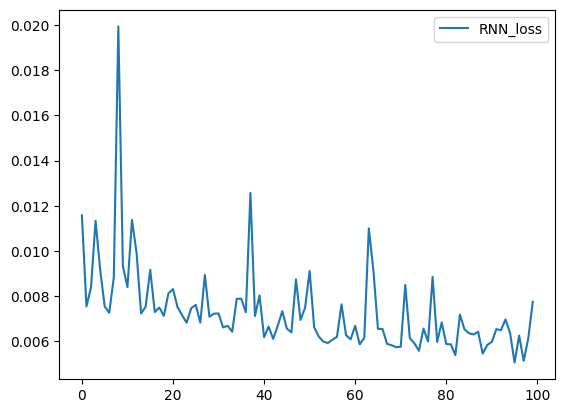

In [23]:
# 训练过程
num_epochs = 100
rnn_loss_history = []

for epoch in tqdm(range(num_epochs)):
    # 批量训练
    for X, Y in train_loader:
        trainer.zero_grad()
        y_pred = model(X)
        loss = criterion(y_pred.squeeze(), Y.squeeze())
        loss.sum().backward()
        trainer.step()
    
    # 输出损失
    model.eval()
    with torch.no_grad():
        total_loss = 0
        for X, Y in train_loader:
            y_pred = model(X)
            loss = criterion(y_pred.squeeze(), Y.squeeze())
            total_loss += loss.sum()/loss.numel()
        avg_loss = total_loss / len(train_loader)
        
    if epoch % 10 == 0:
        print(f'Epoch {epoch}: Validation loss = {avg_loss:.4f}')
    rnn_loss_history.append(avg_loss)

# 绘制损失曲线图
import matplotlib.pyplot as plt
plt.plot(rnn_loss_history, label='RNN_loss')
plt.legend()
plt.show()

In [15]:
len(dji['Close'].to_list()[seq_len:num]),len(rnn_preds[:, seq_len-1].detach())

(1241, 1241)

In [18]:
len(time[num-seq_len:])

16

In [20]:
num

1257

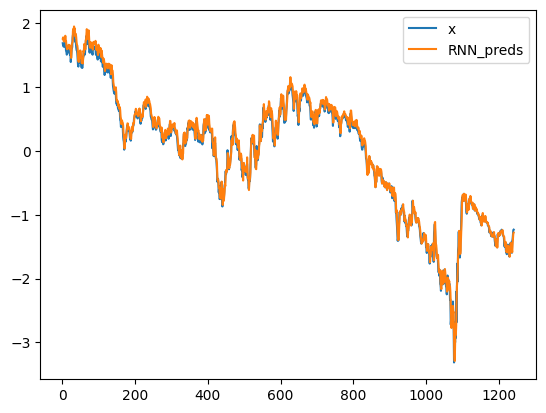

In [26]:
rnn_preds = model(X_feature.unsqueeze(2))
rnn_preds.squeeze_()
time = torch.arange(1, num+1, dtype=torch.float32)  # 时间轴

plt.plot(time[:num-seq_len], x[seq_len:num], label='x')
plt.plot(time[:num-seq_len], rnn_preds[:, seq_len-1].detach(), label='RNN_preds')
plt.legend()
plt.show()

In [32]:
# 设置超参数
input_size = 1
output_size = 1
num_hiddens = 64
n_layers = 2
lr = 0.001

# 建立模型
model_name = ['DRNN', 'BRNN', 'LSTM', 'GRU']
drnn = DRNN(input_size, output_size, num_hiddens, n_layers)
brnn = BRNN(input_size, output_size, num_hiddens, n_layers)
lstm = LSTM(input_size, output_size, num_hiddens, n_layers)
gru = GRU(input_size, output_size, num_hiddens, n_layers)
models = [drnn, brnn, lstm, gru]

opts = [torch.optim.Adam(drnn.parameters(), lr),
        torch.optim.Adam(brnn.parameters(), lr),
        torch.optim.Adam(lstm.parameters(), lr),
        torch.optim.Adam(gru.parameters(), lr)]
criterion = nn.MSELoss(reduction='none')

num_epochs = 50
rnn_loss_history = []

for epoch in tqdm(range(num_epochs)):
    # 批量训练
    for X, Y in train_loader:
        for index, model, optimizer in zip(range(len(models)), models, opts):
            y_pred = model(X)
            loss = criterion(y_pred.squeeze(), Y.squeeze())
            trainer.zero_grad()
            loss.sum().backward()
            trainer.step()

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [01:49<00:00,  2.19s/it]


In [33]:
for i in range(4):
    rnn_preds = models[i](X_feature.unsqueeze(2))
    rnn_preds = rnn_preds.squeeze().detach()
    actual = x[seq_len:num]
    mae = torch.mean(torch.abs(actual - rnn_preds[:, seq_len-1]))
    print(f'{model_name[i]} MAE : {mae:.4f}')

DRNN MAE : 0.8340
BRNN MAE : 0.8436
LSTM MAE : 0.8136
GRU MAE : 0.7767
